In [1]:
#import relevant libraries
import os
from scipy import stats

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
import dabest
import NLCLIMB
import NLMATH
import itertools
from datetime import datetime
date = datetime.today().strftime('%Y%m%d')
from statistics import mean
from textwrap import wrap

#import dabest_2023
import dabest
#import dabest_jck
import plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objects import Layout
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import osar 

#NOTE: SUPPRESSES WARNINGS!

import warnings


warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

print(osar.__version__)

Pre-compiling numba functions for DABEST...


Compiling numba functions: 100%|██████████| 11/11 [00:00<00:00, 13.22it/s]


Numba compilation complete!
0.23.7


In [2]:
basegenotype = "SS95118"
responder = "Chrimson2"
wt = "w1118"
addNotes = basegenotype + " x " + responder
transgenic = addNotes

officecomp = "C:\\Users\\Star\\"
labcomp = "C:\\Users\\User\\"
computer2 = "C:\\Users\\lnico"
computer3 = "D:"

filedirectory_OSAR = "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\"
filedirectory_Falling = "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\"
specifiedpath = officecomp

baseDirectory_OSAR = specifiedpath + filedirectory_OSAR + addNotes
baseDirectory_Falling = specifiedpath + filedirectory_Falling + addNotes

#OSAR related files
if len(addNotes) > 0:
    addNotes = "_" + addNotes   
filename_O = baseDirectory_OSAR + "\\" + basegenotype
filename_AppendDT = "_gen " + date

filename_O = filename_O + addNotes + filename_AppendDT


#Falling related files
filename_F = baseDirectory_Falling + ".csv"
filenamewt_F = specifiedpath + filedirectory_Falling + wt+"_"+ transgenic + ".csv"


filename_O

'C:\\Users\\Star\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\OSAR\\SS95118 x Chrimson2\\SS95118_SS95118 x Chrimson2_gen 20250114'

In [3]:
#for fonts only
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_dirs = [specifiedpath + "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Programs\\"]  # The path to the custom font file.
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)


for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    prop = font_manager.FontProperties(fname=font_file)

[f.name for f in matplotlib.font_manager.fontManager.ttflist]
plt.rcParams["font.family"] = "Fira Mono"

## OSAR - single plot

In [28]:
def singleplottingdabest(dfi, names, parameter):
    dfrr = pd.DataFrame()
    filter1 = dfi[(dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
    filter2 = dfi[(dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

    dfrr[names + " Cntrl" ] = filter2[parameter]
    dfrr[names] = filter1[parameter]
    #dfr1 = pd.concat([dfr1, dfrr], axis = 1)
        
    l = dfrr.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    test = dabest.load(dfrr, idx=titlelst, ci=90)    
    
    return test

In [5]:
#check for border shift
osarAnalysis = osar.osar(baseDirectory_OSAR,
                        # border_shift_mm = 1.5,  
                        # countlog_folder = "countlog_Full Only",         
                        # countlog_folder = "countlog_Half and Full",
                         driver = basegenotype)

Creating borders for each fly...
Done.

Processing CSV 40 of 40
Summarising results for all flies...
All done.


In [ ]:
full_light = osarAnalysis.results[osarAnalysis.results['light_intensity'] == "Full"]
singleplottingdabest(full_light, basegenotype,'log2_speed_ratio_Pattern 01').mean_diff.plot(float_contrast=False, fontsize_rawylabel=8, fontsize_rawxlabel=8, 
                                                                      fontsize_contrastxlabel=8, fontsize_contrastylabel=8, raw_marker_size=2, es_marker_size=6, 
                                                                      custom_palette="Paired", swarm_label="Log2 speed ratio", contrast_ylim=(-1.5,1.5));

In [64]:
speed_osar = float(singleplottingdabest(full_light, basegenotype,'log2_speed_ratio_Pattern 01').mean_diff.statistical_tests['difference'])
speed_osar

0.4373069087457313

## osar - multiplot

In [230]:
respondertype = "Chrimson2"
filepath = "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\DATA\\osar_test\\" + respondertype + " 20241024_compilation_full.csv"
df2= pd.read_csv(specifiedpath + filepath)

basegenotype = df2['driver'].unique()

#dfi=df2[(df2['light_intensity']=='Half') | (df2['light_intensity']=='Full')].copy()
dfi=df2[(df2['light_intensity']=='Full')].copy()
dfi.replace([np.inf, -np.inf], np.nan, inplace=True)
dfi.rename(columns={'driver': 'MBON'}, inplace = True)

In [231]:
def chartplottingdabest(dfi, basegenotype, parameter):
    
    dfr1 = pd.DataFrame()
    for names in basegenotype:
        dfrr = pd.DataFrame()
        filter1 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Offspring')].copy().reset_index(drop=True)
        filter2 = dfi[(dfi['MBON'] == names) & (dfi['status'] == 'Sibling')].copy().reset_index(drop=True)

        dfrr[names + " Cntrl" ] = filter2[parameter]
        dfrr[names] = filter1[parameter]
        dfr1 = pd.concat([dfr1, dfrr], axis = 1)
        
    l = dfr1.columns.tolist()
    titlelst = list(zip(l,l[1:]))[::2]  
    
    test = dabest.load(dfr1, idx=titlelst, ci=90)    
    tab = pd.concat([test.mean_diff.results['test'], test.mean_diff.results['difference']], axis = 1)
    
    arrangedsorting = tab.sort_values(by=['difference'], ascending = True).reset_index(drop=True)

    newlist = []
    for n in arrangedsorting['test']:
        newlist.append((n +" Cntrl", n))

    return dfr1, arrangedsorting['test'], newlist

In [232]:
dfpi, sortedlist, dabestlist = chartplottingdabest(dfi, basegenotype, 'pi_smoothed_Pattern 01')
dfspeed, notsortedlist, notdabestlist = chartplottingdabest(dfi, basegenotype, 'log2_speed_ratio_Pattern 01')

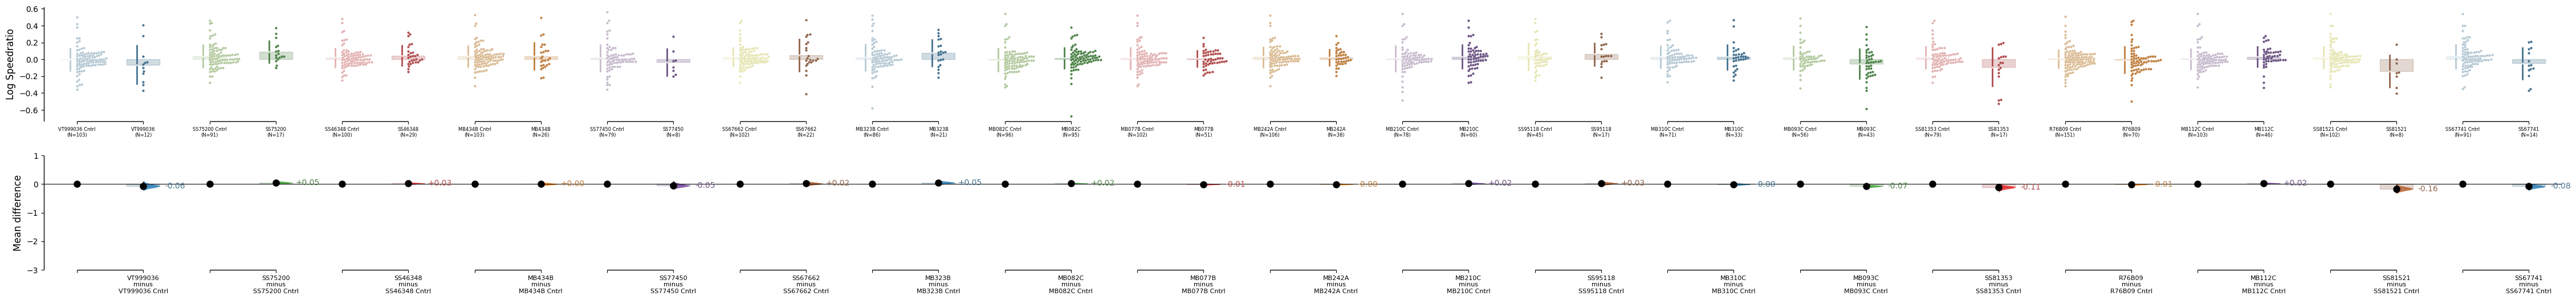

In [233]:
spplot = dabest.load(dfspeed, idx=dabestlist, ci=90)
spplot.mean_diff.plot(fontsize_rawxlabel=6, fontsize_contrastxlabel=8, float_contrast=False, raw_marker_size=1, es_marker_size=8, 
                      custom_palette="Paired", swarm_label="Log Speedratio", contrast_ylim=(-3,1));

#sns.set(font_scale=0.5,  style='ticks')

In [238]:
osar_multiplot = pd.DataFrame()
osar_multiplot['MBON'] = spplot.mean_diff.statistical_tests['test']
osar_multiplot['osar_speed'] = spplot.mean_diff.statistical_tests['difference']

osar_multiplot

,MBON,osar_speed
0,VT999036,-0.064143
1,SS75200,0.051280
2,SS46348,0.025864
3,MB434B,0.003931
4,SS77450,-0.048816
5,SS67662,0.019961
6,MB323B,0.052774
7,MB082C,0.023614
8,MB077B,-0.006336
9,MB242A,-0.004700


## Falling - single plot

In [108]:
def full_lightreplace(df, basegenotype):
    df = df.replace("Full", "Light")
    #df['genre']= df['genre'].replace("Full", "Light")
    df['Type'] = df['Type'].replace("Expt", basegenotype) 

    return df

In [89]:
dfe=pd.read_csv(filename_F)
dfw= pd.read_csv(filenamewt_F)

exptdf = dfe.drop(dfe.columns[[0]],axis = 1)
wtdf = dfw.drop(dfw.columns[[0]],axis = 1)

dfexpt = NLCLIMB.generation(exptdf, basegenotype)
dfwt = NLCLIMB.generation(wtdf, wt)

In [126]:
df_sp = NLMATH.ospeed(dfwt, dfexpt).reset_index(drop=True)
df_sp1 = full_lightreplace(df_sp.copy(), basegenotype)
df_bsp = NLMATH.bspeed(NLMATH.boutspeed(dfexpt), NLMATH.boutspeed(dfwt)).reset_index(drop=True)
df_bsp1 = full_lightreplace(df_bsp.copy(), basegenotype)

dftotal = pd.DataFrame()

dfs2 = NLMATH.deltaversion(df_sp, basegenotype, "Velocity")
dfs2['Genre'] = "Speed"

dfbs2 = NLMATH.deltaversion(df_bsp, basegenotype, "BSpeed")
dfbs2['Genre'] = "Bout_speed"

dftotal_falling = pd.concat([dfs2, dfbs2], axis = 0).reset_index(drop=True)
dftotal_falling['Assay'] = "Falling"

In [ ]:
figfirstplot, axs = plt.subplots(1,2, figsize=(20, 8),sharex = "col")

speedplots = dabest.load(data=df_sp1, x=["ExperimentState","Type"], y="Velocity", delta2 = True, experiment="Type", 
                             experiment_label = ["WT", basegenotype], x1_level = ["Dark","Light"], paired = "baseline", id_col = "index")
speedplots.delta_g.plot(swarm_label="Speed",
                                    contrast_label="Δ Speed", swarm_ylim = (0,25),  contrast_ylim=(-2, 2),fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10, 
                                    fontsize_contrastylabel=10, fontsize_delta2label=10,
                                    ax=axs.flat[0]);

boutspeed_plots = dabest.load(data=df_bsp1, x=["ExperimentState","Type"], y="BSpeed", delta2 = True, experiment="Type", 
                             experiment_label = ["WT", basegenotype], x1_level = ["Dark","Light"], paired = "baseline", id_col = "index")
boutspeed_plots.delta_g.plot(swarm_label="Bout Speed",
                                    contrast_label="Δ Bout Speed", swarm_ylim = (0,25),  contrast_ylim=(-2, 2),fontsize_rawxlabel=7, fontsize_rawylabel=10, fontsize_contrastxlabel=10, 
                                    fontsize_contrastylabel=10, fontsize_delta2label=10,
                                    ax=axs.flat[1]);

## Falling - multiplot

In [4]:
def generating_heatmapdf(responder, dflists2):
    
    
    newfile2 = specifiedpath + "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\Compilation with delta\\20241014collection\\"
    files2 = os.listdir(newfile2)

    for labels in dflists2:
        newfileread = pd.DataFrame()
        for yy in files2:
            if yy.split(" ")[3] == labels and responder in yy:
                newfile2read = pd.read_csv(newfile2 + yy)
                newfileread = pd.concat([newfileread, newfile2read])
        globals()[labels] = (newfileread.set_index("MBON"))
        
    #generating list of MBONS
    MBONList = []
    for yy in files2:
        MBONList.append(yy.split(" ")[0])

    MBONList = list(set(MBONList))
    
    #processing
    dfreg2 = pd.DataFrame()
    for n in MBONList:
        dfreg = pd.DataFrame()
        dfreg["Bout speed"] = dfreg_bspeed[dfreg_bspeed.index == n]['delta_g']
        dfreg["Speed"] = dfreg_speed[dfreg_speed.index == n]['delta_g']
        dfreg["Fall #"] = dfreg_fall[dfreg_fall.index == n]['delta_g']
        dfreg["Height"] = dfreg_height[dfreg_height.index == n]['delta_g']
        #dfreg["Time to reach 3/4 chamber"] = dfreg_time[dfreg_time.index == n]['delta_g']
        # dfreg["Mean\n Pause"] = dfreg_meanpause[dfreg_meanpause.index == n]['delta_g']
        # dfreg["Pause #"] = dfreg_pause[dfreg_pause.index == n]['delta_g']
        dfreg["Mean Bout"] = dfreg_meanbout[dfreg_meanbout.index == n]['delta_g']
        dfreg["Bout #"] = dfreg_bout[dfreg_bout.index == n]['delta_g']
        #dfreg["Bout position"] = dfreg_boutpos[dfreg_boutpos.index == n]['delta_g']
        # dfreg["Pause\n position"] = dfreg_pausepos[dfreg_pausepos.index == n]['delta_g']
        #new features
        dfreg["Max Speed"] = dfreg_maxvelocity[dfreg_maxvelocity.index == n]['delta_g']
        dfreg["Avg Straightness index"] = dfreg_straightindex[dfreg_straightindex.index == n]['delta_g']
        dfreg["displacement between pause"] = dfreg_displacementbetweenpause[dfreg_displacementbetweenpause.index == n]['delta_g']
        
        dfreg["Ascending dist"] = dfreg_ascent[dfreg_ascent.index == n]['delta_g']
        dfreg["Descending dist"] = dfreg_descent[dfreg_descent.index == n]['delta_g']
        dfreg['MBON'] = n
        dfreg2 = pd.concat([dfreg2, dfreg], axis = 0).reset_index(drop=True)
        
    return dfreg2

def find_number(df, lookup_value, genre):
    lobe_values = []
    for _, row in df.iterrows():
        # Splitting the 'MBON' values and removing any potential whitespace
        mbon_values = [x.strip() for x in row['MBON names'].split(',')]
        if lookup_value in mbon_values:
            lobe_values.append(row[genre])
            
    lobelobe = list(set(lobe_values))
    return ', '.join(lobelobe)

def matchingdfs (df, matchingset):
    newdf_a = pd.DataFrame()
    for n in matchingset:
        df_a=pd.DataFrame()
        df_a = df[(df['MBON'] == n)]
        newdf_a = pd.concat([newdf_a, df_a]).reset_index(drop=True)
    return newdf_a

import textwrap

def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)
    
def matchinglobesets(dfreg_a, lobelocation):
    lobelocation_a = lobelocation.sort_values(by=['MBON']).reset_index(drop=True)
    dfreg_a_withloc = dfreg_a.sort_values(by=['MBON']).reset_index(drop=True)
    matchinglobereg = list(set(lobelocation_a['MBON']) & set(dfreg_a_withloc['MBON']))

    dflobe_reg = matchingdfs(lobelocation_a, matchinglobereg).sort_values(by=['MBON']).reset_index(drop=True)

    dfreg_a_withloc['Lobe_location'] = dflobe_reg['Lobe_location']
    dfreg_a_withloc['MBON number'] = dflobe_reg['MBON number']
    dfreg_a_withloc['Neurotransmitter'] = dflobe_reg['Neurotransmitter']

    return dfreg_a_withloc

In [5]:
#lobe location

newfile2 = specifiedpath + "ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\Compilation with delta\\20241014collection\\"
files2 = os.listdir(newfile2)

MBONList = []
for yy in files2:
    MBONList.append(yy.split(" ")[0])

MBONList = list(set(MBONList))

#reading mbonlist file
directorynew = os.path.dirname(os.path.dirname(specifiedpath + "\\ACC Lab Dropbox\\ACC Lab\\Nicole Lee\\Data Compilation\\Falling_New\\")) #goes up one directory
fileinnewdirc = os.listdir(directorynew)

for file_no2 in fileinnewdirc:
    if ".csv" in file_no2:
        ff = os.path.join(directorynew, file_no2)
        csvfile = pd.read_csv(ff)

csvfile = csvfile.astype('string')

for n, k in zip(["B", "y", "a"], ['β', "γ", "α"]):
    csvfile['Lobe'] = csvfile['Lobe'].str.replace(n, k)

lobelocation = pd.DataFrame()

for m in MBONList:
    lobeloc = pd.DataFrame()
    unqlist = []
    lobeloc['MBON'] = [m]
    loclst = find_number(csvfile, m, "Lobe")
    mbonlst = find_number(csvfile, m, "MBON number").strip()
    ntlst = find_number(csvfile, m, "Neurotransmitter")
    lobeloc['Lobe_location'] = [loclst]
    lobeloc['MBON number'] = [mbonlst]
    lobeloc['Neurotransmitter'] = [ntlst]
    
    lobelocation = pd.concat([lobelocation, lobeloc])

lobelocation = lobelocation.reset_index(drop=True)

In [6]:
dflists = ['df_bspeed', 'df_speed', 'df_time', 'df_fall','df_height', 'df_displacement', 'df_meanpause', 'df_pause','df_meanbout', 'df_bout','df_boutpos', 'df_pausepos','df_maxvelocity','df_straightindex', 'df_displacementbetweenpause', "df_ascent", "df_descent"]
dflists2 = [s.replace('df_', 'dfreg_') for s in dflists]

dflists2 = [s.replace('df_', 'dfreg_') for s in dflists]
dfreg_Cr2 = generating_heatmapdf("Chrimson2", dflists2).sort_values('MBON').reset_index(drop=True)
dfreg_ACR = generating_heatmapdf("ACR", dflists2).sort_values('MBON').reset_index(drop=True)

In [7]:
#matchingset = list(set(dfreg_ACR['MBON']) & set(dfreg_Cr2['MBON']))
matchingsetA = dfreg_ACR['MBON']
matchingsetC = dfreg_Cr2['MBON']

dfreg_a = matchingdfs(dfreg_ACR, matchingsetA)
dfreg_c = matchingdfs(dfreg_Cr2, matchingsetC)

dfreg_a['responder'] = dfreg_a['MBON']+"_ACR"
dfreg_c['responder'] = dfreg_c['MBON']+"_CsChrimson"

# dfreg_a['responder'] = dfreg_a['MBON']+"_TubTshCr"
# dfreg_c['responder'] = dfreg_c['MBON']+"_TshCr"

# dfreg_resp = pd.concat([dfreg_a, dfreg_c])

# dfreg_resp = dfreg_resp.sort_values(by = "responder", ascending=True).reset_index(drop=True)

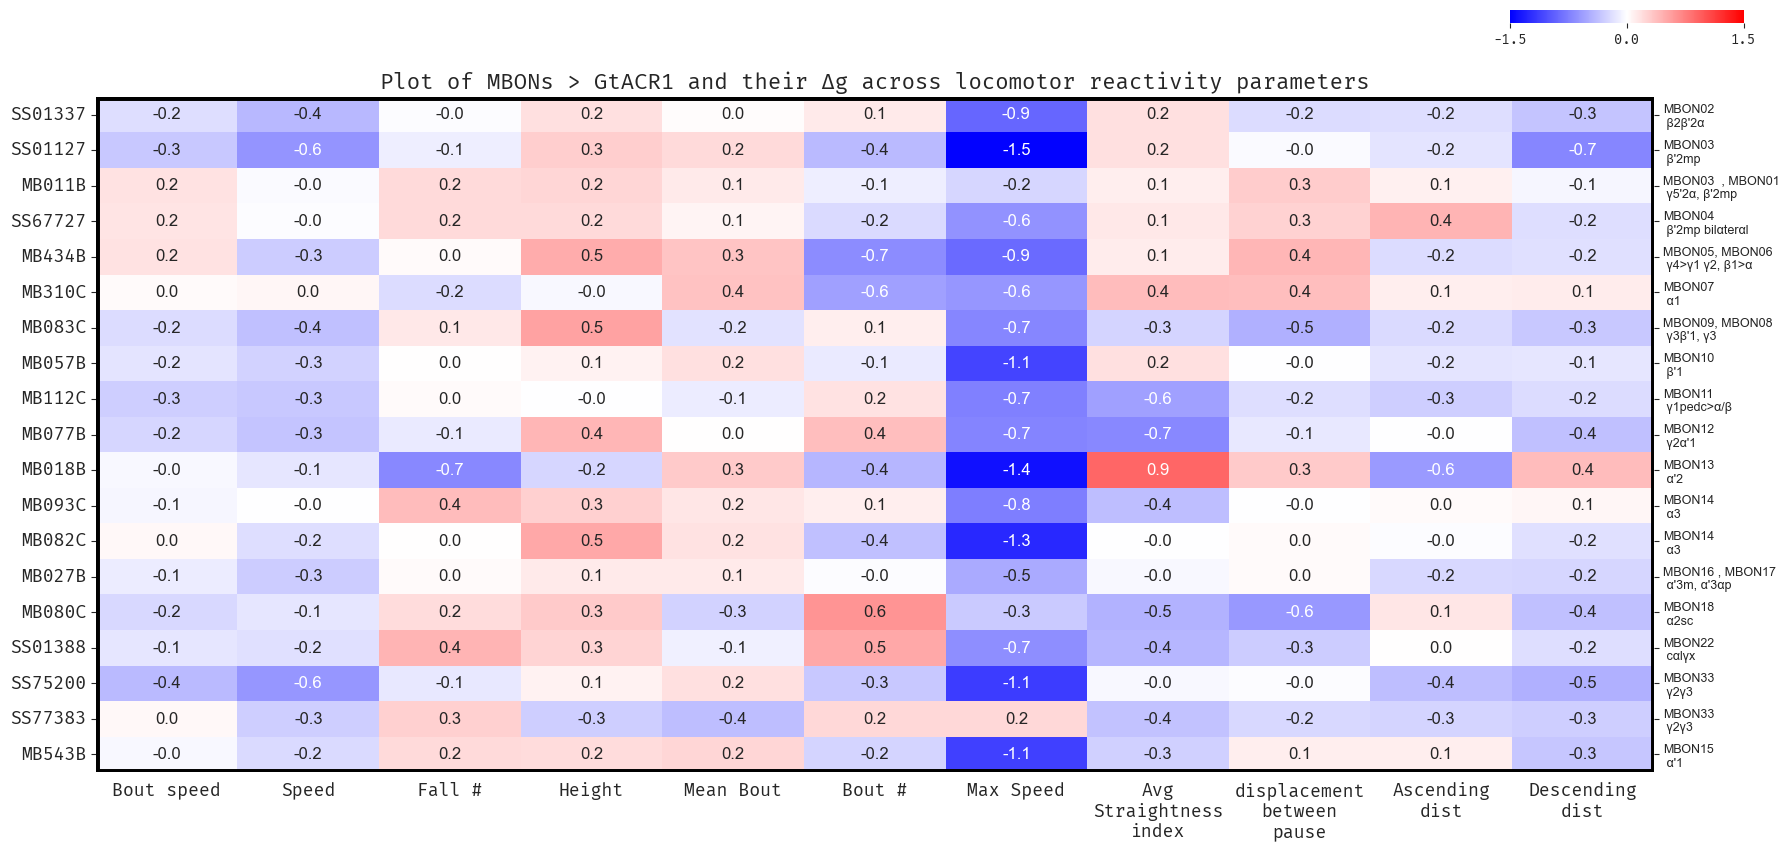

In [10]:
#mini list of only SPECIFIC responder
responder = "ACR"

if responder == 'Chrimson2':
    responderrename = "CsChrimson"
    dfreg_specificresponder = dfreg_c.sort_values(by = "responder", ascending=True).reset_index(drop=True)

if responder == 'ACR':
    responderrename = "GtACR1"
    dfreg_specificresponder = dfreg_a.sort_values(by = "responder", ascending=True).reset_index(drop=True)

plt.rcParams["font.family"] = "Fira Mono"

lstofmbonsiwant = MBONList
df_specificmbon = pd.DataFrame()
for n in lstofmbonsiwant:
    df_specificmbon = pd.concat([df_specificmbon, dfreg_specificresponder[dfreg_specificresponder['MBON'] == n]])
    
df_specificmbon = df_specificmbon.reset_index(drop=True)
df60 = df_specificmbon.set_index(['MBON'])
df60 = df60.drop(['responder'], axis =1)
fig1, ax4 = plt.subplots(figsize=(18, 8))     

#adding extra axes label
lobloclst = []
mbonloclst = []
for n in df_specificmbon['MBON']:
    df600 = df_specificmbon.copy()
    lobloclst.append(lobelocation[lobelocation['MBON'] == n]['Lobe_location'].values[0])
    mbonloclst.append(lobelocation[lobelocation['MBON'] == n]['MBON number'].values[0])
df600['Lobe'] = lobloclst
df600['Name'] = mbonloclst

df600 = df600.sort_values(by = "Name", ascending=True).reset_index(drop=True)
df60extra = df600.iloc[:,:-3].set_index('MBON')   #change depending on parameters

newdf600 = pd.DataFrame()
naming = df600['Name'].to_frame().rename(columns = {"Name": ""})
lobing = df600['Lobe'].to_frame().rename(columns = {"Lobe": ""})
newlabel =(naming.values + "\n " + lobing.values).tolist()
newdf600['Merge'] = newlabel

#colorbar
cax = inset_axes(ax4,
                 width="15%",  # width: 40% of parent_bbox width
                 height="2%",  # height: 10% of parent_bbox height
                 loc='lower right',
                 bbox_to_anchor=(0.04, 1.15, 1, 1),
                 bbox_transform=ax4.transAxes,
                 borderpad=-2,
                 )

sns.set_style("whitegrid", {'axes.grid' : False})    
       
j7 = sns.heatmap(df60extra, ax = ax4, annot=True, fmt=".1f", vmin = -1.5, vmax = 1.5, cmap='bwr', linewidths=0.0, edgecolor = "none"
                 , clip_on=False, cbar_ax=cax, cbar_kws = dict(orientation = "horizontal", ticks = [-1.5,0,1.5]), annot_kws={"size": 12, }) #use_gridspec=False,location="bottom", shrink = 0.25, pad=0.01 #cbar_kws = dict(orientation = "vertical")
#twilight_shifted also a possible color

j7.set_ylabel('')
j7.set_yticklabels(j7.get_yticklabels(), va='center', rotation = 0, fontsize = 13)
j7.set_xticklabels(j7.get_xticklabels(), rotation = 0, fontsize = 13)

wrap_labels(j7, 10)

# from matplotlib.patches import Rectangle

# for i in list(range(0,46,2)):
#     ax4.add_patch(Rectangle((0, i), 9, 2, fill=False, edgecolor='black', lw=2))

# Drawing the frame 
j7.axhline(y = 0, color = 'k',  
            linewidth = 5) 
  
j7.axhline(y = 19, color = 'k', 
            linewidth = 5) 
  
j7.axvline(x = 0, color = 'k', 
            linewidth = 5) 
  
j7.axvline(x = 11, color = 'k', 
            linewidth = 5) 

#secondary axes
j8 = j7.twinx()
j8.set_ylim([0,j7.get_ylim()[0]])
j8.set_yticks(j7.get_yticks())


#y labels for mbon lobes and naming
labellinglist = newdf600['Merge'].iloc[::-1]
labelledlist = []
for n in labellinglist:
    labelledlist.extend(n)
    #inserts blank space after every list name
j8.set_yticklabels(labelledlist, fontsize=9)
j8.spines['top'].set_visible(False)
j8.spines['right'].set_visible(False)
j8.spines['bottom'].set_visible(False)
j8.spines['left'].set_visible(False)

j7.set_title('Plot of MBONs > ' + responderrename +' and their Δg across locomotor reactivity parameters', x=0.5, weight='bold', fontsize =16)

fig1.tight_layout()

#plt.savefig(openPath + "images\\" + date + "_" + responder + "_deltagheatmapwithlobelocations.png", dpi = 1200)

# Total

## Direct comparison (Falling delta g and OSAR delta)

In [143]:
df_directcomp = pd.DataFrame()

df_directcomp['osar_speed'] = [speed_osar]
df_directcomp['falling_speed'] = dftotal_falling[dftotal_falling['Genre'] == "Speed"]["delta_g"].reset_index(drop=True)
df_directcomp['falling_boutspeed'] = dftotal_falling[dftotal_falling['Genre'] == "Bout_speed"]["delta_g"].reset_index(drop=True)
df_directcomp['MBON'] = basegenotype


df_directcomp

,osar_speed,falling_speed,falling_boutspeed,MBON
0,0.437307,-0.421,0.135,SS95118


## Falling to Log speed ratio

In [180]:
## will look at overall speed/fly in light - overall speed/fly in darkimport math
import math

df_sp = NLMATH.ospeed(dfwt, dfexpt).reset_index(drop=True)

df_srfalling = pd.DataFrame()

for n in df_sp['index'].unique().tolist():
    df_temp = pd.DataFrame()
    sectioned = df_sp[df_sp['index']==n]
    darkvalue = float(sectioned[sectioned["ExperimentState"] == "Dark"]['Velocity'])
    lightvalue = float(sectioned[sectioned["ExperimentState"] == "Full"]['Velocity'])
    speedratio = math.log2(lightvalue/darkvalue)
    df_temp["Name"] = [n]
    df_temp["Speedratio"] = [speedratio]
    df_temp["Type"] = sectioned["Type"].unique().tolist()
    df_srfalling = pd.concat([df_srfalling, df_temp])

df_srfalling = df_srfalling.replace("Expt", basegenotype)

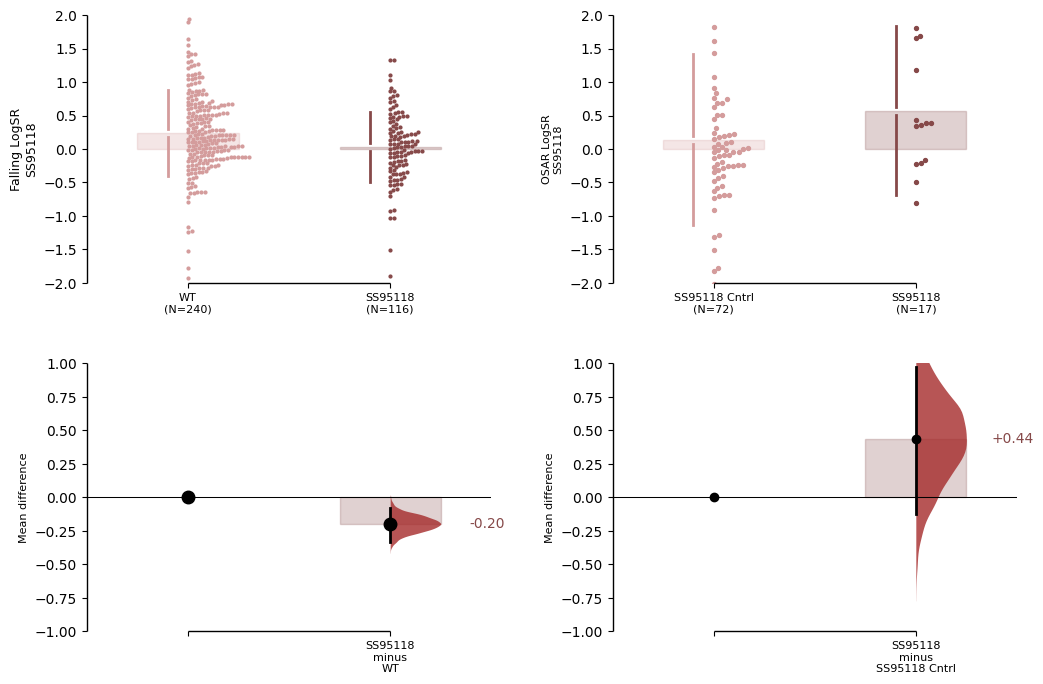

In [ ]:
figsecondplot, axs1 = plt.subplots(1,2, figsize=(12, 8),sharex = "col", gridspec_kw={'wspace': 0.3})

fallingtosarplots = dabest.load(df_srfalling, idx = ("WT", basegenotype), x= "Type", y = "Speedratio")
fallingtosarplots.mean_diff.plot(float_contrast=False, raw_marker_size=1, swarm_ylim = (-2,2), contrast_ylim=(-1, 1), fontsize_rawxlabel=8, fontsize_rawylabel=9, fontsize_contrastxlabel=8, 
                                    fontsize_contrastylabel=8, custom_palette={"WT" : 'lightcoral', basegenotype :'brown'}, swarm_label="Falling LogSR\n" + basegenotype, ax=axs1.flat[0]);

singleplottingdabest(full_light, basegenotype,'log2_speed_ratio_Pattern 01').mean_diff.plot(float_contrast=False, fontsize_rawylabel=8, fontsize_rawxlabel=8, swarm_ylim = (-2,2), contrast_ylim=(-1, 1),
                                                                      fontsize_contrastxlabel=8, fontsize_contrastylabel=8, raw_marker_size=2, es_marker_size=6, 
                                                                      custom_palette={basegenotype + " Cntrl" : 'lightcoral', basegenotype :'brown'}, swarm_label="OSAR LogSR\n" + basegenotype, ax=axs1.flat[1]);

## OSAR to Falling Speed

In [224]:
full_light.columns

Index(['exptDate', 'driver', 'expt_time_start', 'genotype', 'opsin',
       'light_intensity', 'light_color', 'status',
       'reversals_to_light_BASELINE', 'traversals_to_light_BASELINE',
       'reversals_to_dark_BASELINE', 'traversals_to_dark_BASELINE',
       'light_attraction_index_BASELINE', 'pi_smoothed_BASELINE',
       'log2_speed_ratio_BASELINE', 'distance_in_light_BASELINE',
       'time_in_light_BASELINE', 'distance_in_dark_BASELINE',
       'time_in_dark_BASELINE', 'time_in_choice_zone_BASELINE',
       'speed_before_cross_to_dark_BASELINE',
       'speed_after_cross_to_dark_BASELINE',
       'speed_before_cross_to_light_BASELINE',
       'speed_after_cross_to_light_BASELINE', 'reversals_to_light_Pattern 01',
       'traversals_to_light_Pattern 01', 'reversals_to_dark_Pattern 01',
       'traversals_to_dark_Pattern 01', 'light_attraction_index_Pattern 01',
       'pi_smoothed_Pattern 01', 'log2_speed_ratio_Pattern 01',
       'distance_in_light_Pattern 01', 'time_in_light